## Project 6 (Chapter 5) Probability Distributions

add in notes from project 6

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# np.linspace(a,b,ndiv) create a line from a to be with the 
## number of divisions ndiv (its cutting 1000 pieces)
def normal_dist(mean , sd, x = np.linspace(-10, 10, 1000)):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
mean = 0
sd = 1
x = np.linspace(-10,10,1000)
y = normal_dist(mean, sd, x = x)
y

In [ ]:
norm_df = pd.DataFrame([x,y], index = ["x","y"]).T
norm_df = norm_df.set_index("x")
norm_df.loc[-.05:0.05]

In [ ]:
norm_df.loc[-1:1].plot()

In [ ]:
plt.rcParams.update({'font.size': 32})

# create a multiplot that has 3 stacked visualizatoin
## axs will have indices 0,1,2
fig, axs = plt.subplots(3,1, figsize = (16, 24))
normal_dist_list = normal_dist(mean = 0, sd = 1)

## in plot 0, only create a standard normal distribution with 
### mean = 0 and sd = 1
axs[0].plot(x, normal_dist_list)
axs[0].set_title("Standard Normal Distribution")

# in plot 1, create 3 distributions with means of -1,0,1 and sd =1
for mean_ in range(-1,1+1,1):
    normal_dist_list = normal_dist(mean = mean_, sd = 1)
    axs[1].plot(x, normal_dist_list, label = "Normal Distribution")
    axs[1].set_title("Normal Distribution with Different Means")

    # in plot 2, create 3 distribution with mean = 0 and sds of 1,2,3
for sd_ in range(-1,4):
    normal_dist_list = normal_dist(mean = 0, sd = sd_)
    axs[2].plot(x, normal_dist_list, label = "Normal Distribution")
    axs[2].set_title("Normal Distribution with Different SDs")

## Lognormal Distribution
The probability density function of the distribution is:

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mrow>
      <mi>x</mi>
      <mi>&#x3C3;</mi>
      <msqrt>
        <mn>2</mn>
        <mi>&#x3C0;</mi>
      </msqrt>
    </mrow>
  </mfrac>
  <msup>
    <mi>e</mi>
    <mrow data-mjx-texclass="ORD">
      <mfrac>
        <mrow>
          <mo>&#x2212;</mo>
          <mo stretchy="false">(</mo>
          <mi>l</mi>
          <mi>n</mi>
          <mi>x</mi>
          <mo>&#x2212;</mo>
          <mi>&#x3BC;</mi>
          <msup>
            <mo stretchy="false">)</mo>
            <mn>2</mn>
          </msup>
        </mrow>
        <mrow>
          <mn>2</mn>
          <msup>
            <mi>&#x3C3;</mi>
            <mn>2</mn>
          </msup>
        </mrow>
      </mfrac>
    </mrow>
  </msup>
</math>

In [ ]:
def create_lognormal(mean, sd, x = np.linspace(0,10,1000)):
    prob_density = (1 / x * sd * np.sqrt(2*math.pi))*math.e**(-(np.log(x) - mean)**2 / (2*sd **2))
    return prob_density

# start linspace from 0; log(0) will be a null value, but the next value will not be null
x = np.linspace(0,10,1000)
lognorm = create_lognormal(0,1,x)
fig, axs = plt.subplots(2,1, figsize = (15,15))
axs[0].plot(x, lognorm)
axs[0].set_title("Log Normal Distribution without Logged x-axis")
axs[1].plot(x, lognorm)
axs[1].set_xscale("log")
axs[1].set_title("Log Normal Distribution with Logged x-axis")

Binominal

copy paste from notes

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime

yf.pdr_override()
start = datetime.datetime(2012,1,1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA"]
for key in stocks:
    data_dict[key] = web.get_data_yahoo(key, start, end)

In [ ]:
data_dict["AAPL"]

In [ ]:
# pd.concatenate will join a list of series values wither vertically (axis - 0)
## or join them horizontally (axis = 1)
close_data = pd.concat([val["Close"] for val in data_dict.values()],
                       # keys dictionary should be in the same order as each relevant "Close series"
                      keys = data_dict.keys(),
                      axis = 1)
close_data

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(legend = True, ax = ax)
ax.set_title("Daily Stock Prices")

### Logging data helps compare relative changes

In [ ]:
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(legend = True, ax = ax)
ax.set_title("Daily Stock Prices\n(Logged Y-axis)")
ax.set_yscale("log")
# reset y labels to integer (get rid of scientific notation)
y_vals = ax.get_yticks()
# use generator to transform each y value into an integer
ax.set_yticklabels([int(y) for y in y_vals])

Proposal is due this week!!!

In [ ]:
fig, ax = plt.subplots(figsize = (24,16))
close_data["AAPL"].hist(bins = 50, label = "AAPL")
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize = (24,16))
close_data.hist(bins = 50, alpha = 0.5, ax = ax)

### Log the data so that changes in the data are approximate percent changes (ie. proportional)

In [ ]:
import numpy as np
log_data = np.log(close_data)
fig, ax = plt.subplots(figsize = (24, 16))
log_data["AAPL"].hist(bins = 50, label = "AAPL")
plt.legend()

In [ ]:
def graph_yearly_distribution(data, key):
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = (24,16))
    for year in years:
        color = "C"+str(year%12)
        year = str(year)
        plot_data = data.loc[year, key]
        plot_data.hist(bins = 20, color = color,
                      label = year,
                      alpha = 0.6,
                      ax = ax)
        ax.axvline(plot_data.mean(),
                  color = color,
                  linewidth = 5,
                  ls = "--")
    ax.set_title(key)
    ax.legend(bbox_to_anchor = (-0.05,1))

In [ ]:
graph_yearly_distribution(log_data, "AAPL")

In [ ]:
price_change_data =log_data.diff().mul(100).dropna()
price_change_data.to_csv("StockData.csv")

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
price_change_data.plot.line(marker = ".", ls = "",
                           ax = ax,
                           markersize = 7,
                           alpha = .4,
                           legend = False)
ax.legend(bbox_to_anchor = (1,1))

In [ ]:
from stats import *
stats_df = gather_statistics(price_change_data,
                            sample = True).round(2)
stats_df

In [ ]:
fig, ax = plt.subplots(figsize = (24,16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
ax.legend()

In [ ]:
graph_yearly_distribution(price_change_data, "AAPL")

C:\Users\aleah\AppData\Local\Temp\ipykernel_21728\98562901.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  price_change_data.hist(alpha = .5,


array([[<Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'AAPL'}>],
       [<Axes: title={'center': 'PG'}>, <Axes: title={'center': 'TSLA'}>]],
      dtype=object)

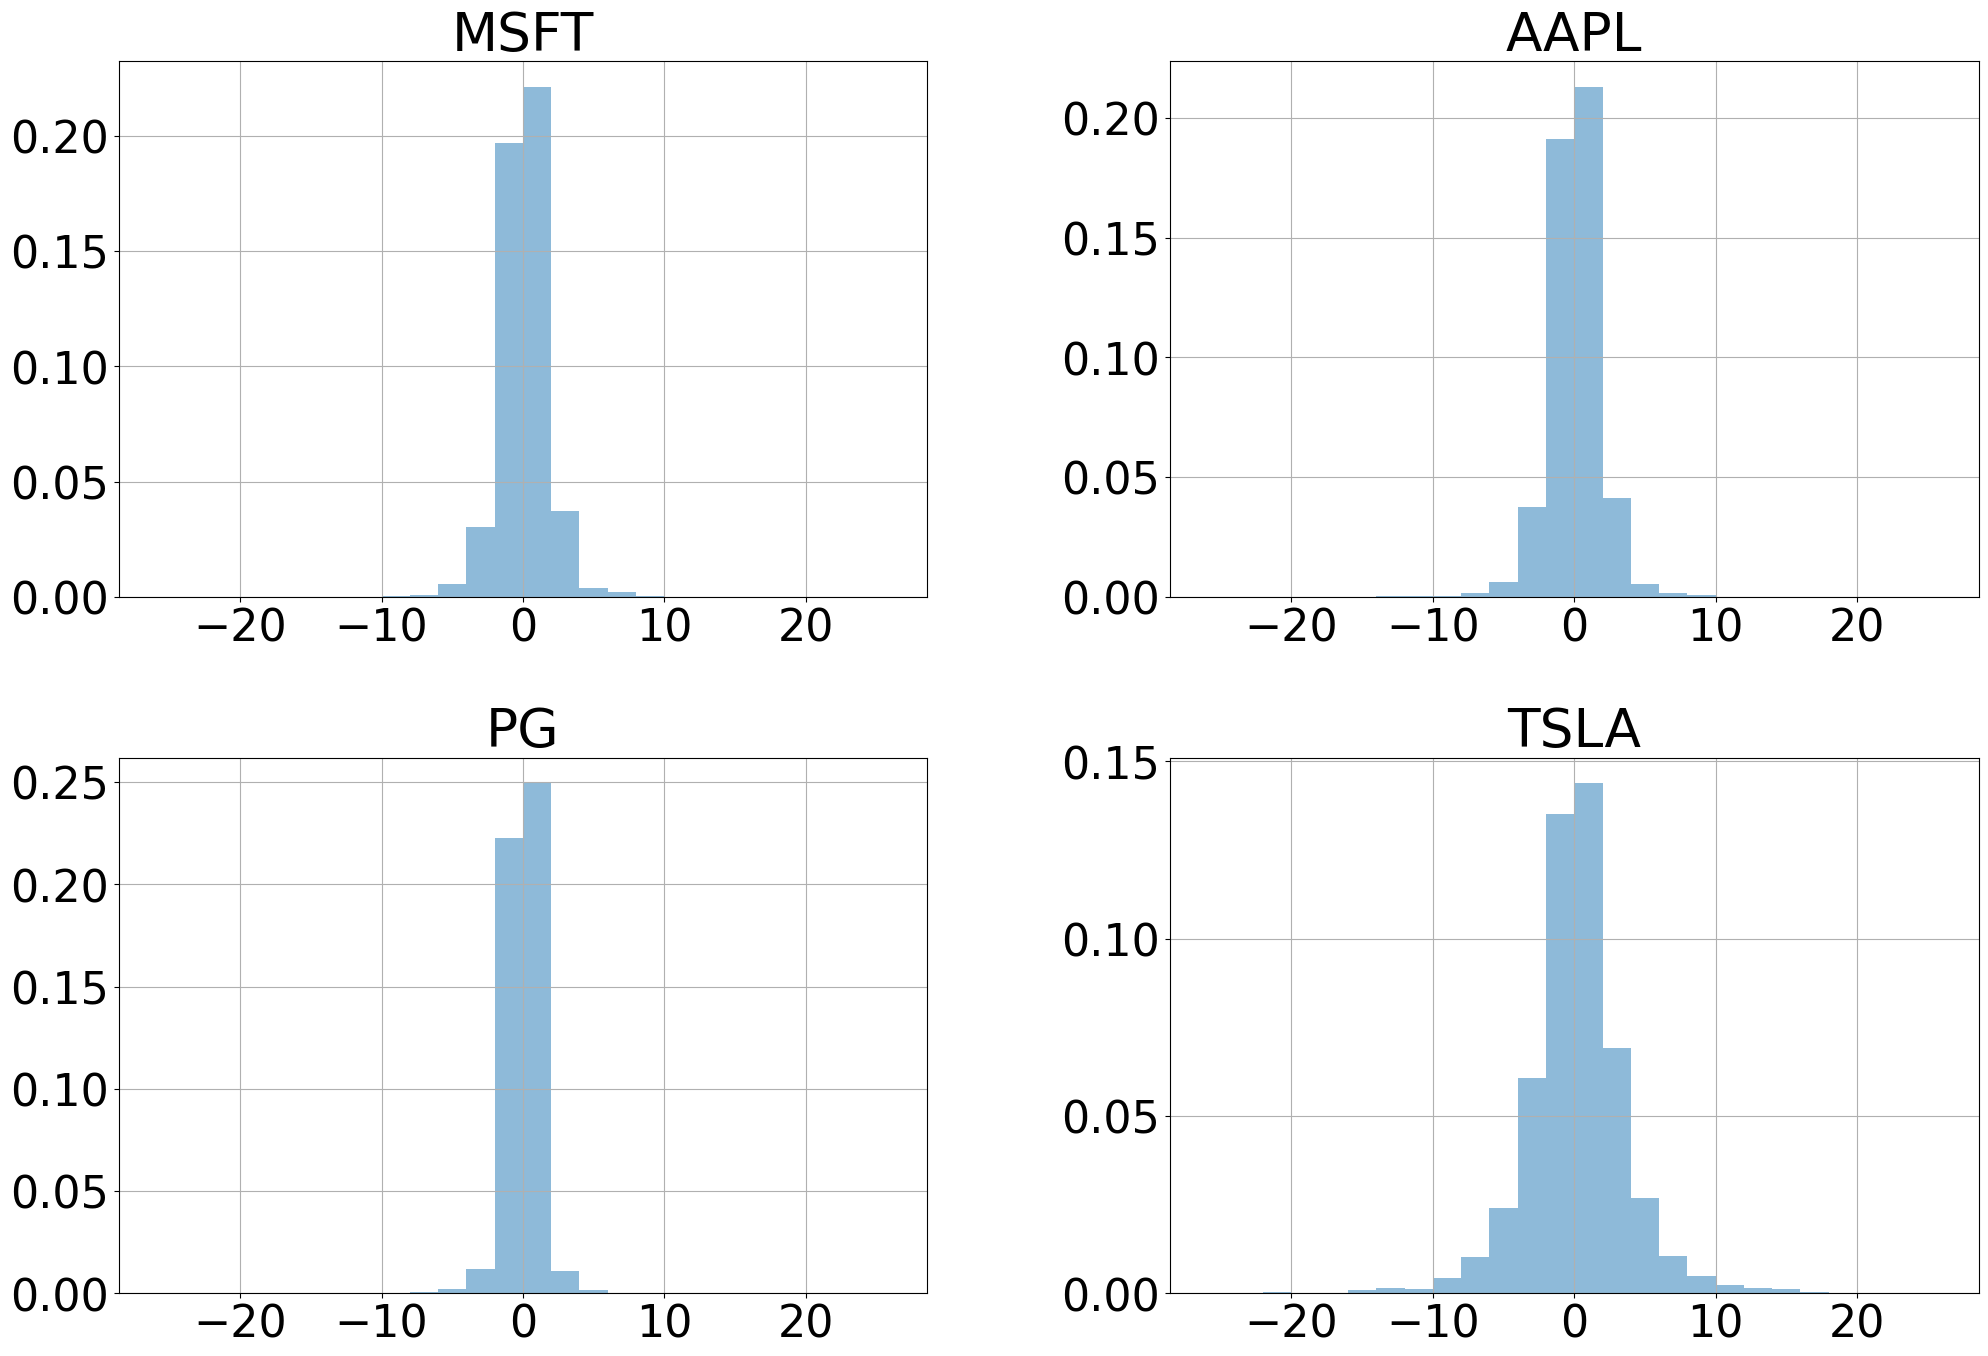

In [21]:
fig, ax = plt.subplots(figsize = (24,16))
# for key in price_change_data:
price_change_data.hist(alpha = .5, 
                      ax = ax, 
                      density = True,
                      bins = [i for i in range(-26, 27, 2)])

In [ ]:
from pandas.plotting import table

# plot with 2 columns and 2 rows for subplots
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, 
                       alpha = .3, 
                       label = price_change_data.keys(), 
                       ax = ax, 
                       density = True)

# plot table with summary statistics
# cycle through each row in ax
for i in range(len(ax)):
    print(ax[i])
    for j in range(len(ax[i])):
    # select hist plot for each stock
        a = ax[i][j]
        # identify stock
        stock = a.get_title()
        print(stock,a)
        # save summary statistics data
        hist_data = stats_df[stock] 
        print(hist_data)
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, 
                     colWidths=[.1], 
                     cellColours=[[(.9,.9,.9)]]*6, 
                     loc = "upper right")
        stats.scale(1.25,2.5)
#        stats.auto_set_font_size(False)
#        stats.set_fontsize(20)

        a.axvline(x = hist_data.loc["mean"], ls = "--", color = "k", alpha = 0.9)
        x_vals = a.get_xticks()
        y_vals = a.get_yticks()
        
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        a.set_yticklabels([str(int(y*100)) + "%" for y in y_vals])
        a.grid(False)

In [23]:
ax[0][0], ax[0][1], ax[1][0], ax[1][1]

(<Axes: title={'center': 'MSFT'}>,
 <Axes: title={'center': 'AAPL'}>,
 <Axes: title={'center': 'PG'}>,
 <Axes: title={'center': 'TSLA'}>)